# Imports

In [1]:
import numpy as np 
import pandas as pd
import geopandas as gpd

import tensorflow as tf
print(tf.__version__)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pathlib import Path
repo_path = Path.cwd().parent
print(repo_path)

2.3.0
C:\Users\31631\Documents\Minor ADS\Project butterfly Naturalis\datics-butterfly-project


# Functions

In [2]:
# Create categorical values (from string to int)
def create_cat_values(column, column_name):
    column = column.copy()
    column = column.astype('category')
    d = column.cat.categories
    column = column.cat.codes
    uniques = len(column.unique())
    print(f'{column_name} contains {str(uniques)} categories')
    return column, d

def plot_loss(model_name, model):
    loss = model.history['loss']
    plt.plot(loss)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title(f'Loss of model {model_name} = {min(loss)}')
    plt.show()
    
def plot_accuracy(model_name, model):
    acc = model.history['accuracy']
    plt.plot(acc)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title(f'Accuracy of model {model_name} = {max(acc)}')
    plt.show()
    
def plot_sparse_accuracy(model_name, model):
    acc = model.history['sparse_top_k_categorical_accuracy']
    plt.plot(acc)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title(f'Accuracy of model {model_name} = {max(acc)}')
    
def plot_correlation_matrix(dataframe):
    corrmatrix = dataframe.corr()
    mask = np.zeros_like(corrmatrix)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(7, 5))
        ax = sns.heatmap(corrmatrix, mask=mask, vmax=.3, square=True)

def get_index_of_observations(y_test):
    
    i = 0

    i_list_vlinder_1 = []
    i_list_vlinder_2 = []
    i_list_vlinder_3 = []
    i_list_vlinder_4 = []
    i_list_vlinder_5 = []

    for items in y_test:
        v1 = items[0]
        v2 = items[1]
        v3 = items[2]
        v4 = items[3]
        v5 = items[4]

        if v1 == 1:
            i_list_vlinder_1.append(i)

        if v2 == 1:
            i_list_vlinder_2.append(i)

        if v3 == 1:
            i_list_vlinder_3.append(i)

        if v4 == 1:
            i_list_vlinder_4.append(i)

        if v5 == 1:
            i_list_vlinder_5.append(i)

        i = i + 1
    return i_list_vlinder_1, i_list_vlinder_2, i_list_vlinder_3, i_list_vlinder_4, i_list_vlinder_5


def threshold(threshold, y2_pred):
    
    y2_pred_threshold = y2_pred.copy()

    for idx1, l in enumerate(y2_pred):
        for idx2, e in enumerate(l):

            if l[idx2] > threshold:
                y2_pred_threshold[idx1, idx2] = 1

            else:
                y2_pred_threshold[idx1, idx2] = 0
    
    return y2_pred_threshold

def predict_accuracy(y_test, y2_pred_threshold, butterflies):
    
    acc_vlinder_1 = accuracy_score_butterfly1 = accuracy_score(y_test[butterflies[0], 0], y2_pred_threshold[butterflies[0], 0])
    acc_vlinder_2 = accuracy_score_butterfly2 = accuracy_score(y_test[butterflies[1], 1], y2_pred_threshold[butterflies[1], 1])
    acc_vlinder_3 = accuracy_score_butterfly3 = accuracy_score(y_test[butterflies[2], 2], y2_pred_threshold[butterflies[2], 2])
    acc_vlinder_4 = accuracy_score_butterfly4 = accuracy_score(y_test[butterflies[3], 3], y2_pred_threshold[butterflies[3], 3])
    acc_vlinder_5 = accuracy_score_butterfly5 = accuracy_score(y_test[butterflies[4], 4], y2_pred_threshold[butterflies[4], 4])
    
    return acc_vlinder_1, acc_vlinder_2, acc_vlinder_3, acc_vlinder_4, acc_vlinder_5


def scatter_plot(x, y, x_label, y_label, title, threshold):
    plt.scatter(x, y)
    plt.axhline(y=threshold, color='r', linestyle='-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
def boxplot(my_dict,x_label, y_label, title,threshold):
    fig, ax = plt.subplots()
    ax.boxplot(my_dict.values())
    ax.set_xticklabels(my_dict.keys())
    plt.axhline(y=threshold, color='r', linestyle='-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

def analyse(X_train, X_test, y_train, y_test, model, thresh):
    
    y_test = np.asarray(y_test).astype('float32').reshape((-1,5))
    y_pred = model.predict(X_test)

    i_list_vlinder_1, i_list_vlinder_2, i_list_vlinder_3, i_list_vlinder_4, i_list_vlinder_5 = get_index_of_observations(y_test)
    
    butterflies = []
    butterflies.append(i_list_vlinder_1)
    butterflies.append(i_list_vlinder_2)
    butterflies.append(i_list_vlinder_3)
    butterflies.append(i_list_vlinder_4)
    butterflies.append(i_list_vlinder_5)

    y_pred_threshold = threshold(thresh, y_pred)

    accuracy_score_butterfly1, accuracy_score_butterfly2, accuracy_score_butterfly3, accuracy_score_butterfly4, accuracy_score_butterfly5 = predict_accuracy(y_test, y_pred_threshold, butterflies)

    y_pred_threshold = threshold(thresh, y_pred)

    
    #scatterplots
    scatter_plot(i_list_vlinder_1, y_pred[butterflies[0],0], "", "prediction value", "scatterplot butterfly 1 acc: " + str(accuracy_score_butterfly1), thresh)
    scatter_plot(i_list_vlinder_2, y_pred[butterflies[1],1], "", "prediction value", "scatterplot butterfly 2 acc: " + str(accuracy_score_butterfly2), thresh)
    scatter_plot(i_list_vlinder_3, y_pred[butterflies[2],2], "", "prediction value", "scatterplot butterfly 3 acc: " + str(accuracy_score_butterfly3), thresh)
    scatter_plot(i_list_vlinder_4, y_pred[butterflies[3],3], "", "prediction value", "scatterplot butterfly 4 acc: " + str(accuracy_score_butterfly4), thresh)
    scatter_plot(i_list_vlinder_5, y_pred[butterflies[4],4], "", "prediction value", "scatterplot butterfly 5 acc: " + str(accuracy_score_butterfly5), thresh)
    
    #boxplot
    my_dict = {'v1': y_pred[i_list_vlinder_1,0], 
           'v2': y_pred[i_list_vlinder_2,1], 
           'v3': y_pred[i_list_vlinder_3,2], 
           'v4': y_pred[i_list_vlinder_4,3], 
           'v5': y_pred[i_list_vlinder_5,4]}
    
    boxplot(my_dict,"", "prediction value", "boxplot of all butterflies", thresh)
    
    #classification report
    print(classification_report(y_test, y_pred_threshold))

# From laurens we recieved the following points of feedback:
1. Make use of different loss and accuracy functions
2. Make a selection of two types of butterflies
3. Less layers to train with
4. Keep decreasing the number of neurons as the layers continue
5. Check the output
6. We dont have a classification problem but a multilabel-problem.

Accuracy:
https://keras.io/api/metrics/accuracy_metrics/#sparsetopkcategoricalaccuracy-class
<br>
Loss:
https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class

## Creating a selection of a few butterflies with different patterns:
The selection was made by Vincent Kalkman, which is a known biologist from Naturalis and gave us a list of butterflies that we can use:
- Parnassius apollo 
- Zerynthia rumina
- Agriades optilete
- Melanargia galathea
- boloria titania 

Making a dataframe with the selected butterflies and making them into categorical values

In [3]:
df = pd.read_csv(repo_path / 'data/prepared/data_merged.csv', index_col=0)

butterfly_list = ['Parnassius apollo', 
                'Zerynthia rumina', 
                'Agriades optilete',
                'Melanargia galathea', 
                'Boloria titania']

# Only use selected butterflies
df = df[df['taxon_full_name'].isin(butterfly_list)]

df.head()

,taxon_full_name,obs_latitude,obs_longitude,"Cropland, rainfed",Herbaceous cover,Tree or shrub cover,"Cropland, irrigated or post-flooding","Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)","Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)","Tree cover, broadleaved, evergreen, closed to open (>15%)",...,BioClim_11,BioClim_12,BioClim_13,BioClim_14,BioClim_15,BioClim_16,BioClim_17,BioClim_18,BioClim_19,Land Climate
9432,Parnassius apollo,45.872806,7.298264,0,0,0,0,0,0,0,...,0.490205,0.302439,0.228972,0.470199,0.073992,0.243311,0.464503,0.349854,0.249545,10
9433,Parnassius apollo,42.486523,0.859988,0,0,0,0,0,0,0,...,0.540456,0.307604,0.261682,0.430464,0.118185,0.251672,0.478702,0.344023,0.228597,4
9434,Parnassius apollo,42.594831,0.003154,0,0,0,0,0,0,0,...,0.578163,0.281205,0.235981,0.364238,0.138353,0.238294,0.409736,0.294461,0.228597,4
9435,Parnassius apollo,47.020877,12.341240,0,0,0,0,0,0,0,...,0.376792,0.358393,0.364486,0.450331,0.230099,0.367893,0.442191,0.674927,0.180328,22
9436,Parnassius apollo,45.900139,7.488521,0,0,0,0,0,0,0,...,0.518522,0.260258,0.203271,0.417219,0.070182,0.201505,0.419878,0.319242,0.196721,4


In [4]:
# Count unique values
df['taxon_full_name'].value_counts()

Melanargia galathea    3033
Parnassius apollo      1122
Zerynthia rumina        692
Boloria titania         548
Agriades optilete       225
Name: taxon_full_name, dtype: int64

In [5]:
# Transfrom species names and land climate names into categorial digits
df['taxon_full_name'], categories_taxon = create_cat_values(df['taxon_full_name'], 'taxon_full_name')
df.head()

taxon_full_name contains 5 categories


,taxon_full_name,obs_latitude,obs_longitude,"Cropland, rainfed",Herbaceous cover,Tree or shrub cover,"Cropland, irrigated or post-flooding","Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)","Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)","Tree cover, broadleaved, evergreen, closed to open (>15%)",...,BioClim_11,BioClim_12,BioClim_13,BioClim_14,BioClim_15,BioClim_16,BioClim_17,BioClim_18,BioClim_19,Land Climate
9432,3,45.872806,7.298264,0,0,0,0,0,0,0,...,0.490205,0.302439,0.228972,0.470199,0.073992,0.243311,0.464503,0.349854,0.249545,10
9433,3,42.486523,0.859988,0,0,0,0,0,0,0,...,0.540456,0.307604,0.261682,0.430464,0.118185,0.251672,0.478702,0.344023,0.228597,4
9434,3,42.594831,0.003154,0,0,0,0,0,0,0,...,0.578163,0.281205,0.235981,0.364238,0.138353,0.238294,0.409736,0.294461,0.228597,4
9435,3,47.020877,12.341240,0,0,0,0,0,0,0,...,0.376792,0.358393,0.364486,0.450331,0.230099,0.367893,0.442191,0.674927,0.180328,22
9436,3,45.900139,7.488521,0,0,0,0,0,0,0,...,0.518522,0.260258,0.203271,0.417219,0.070182,0.201505,0.419878,0.319242,0.196721,4


## Prepare the data
Final preperations and check correlations

In [6]:
# Features X gets all columns except first column
X = df.iloc[:, 1:]
# Label y gets first column which is 'taxon_full_name'
y = df.iloc[:, 0]

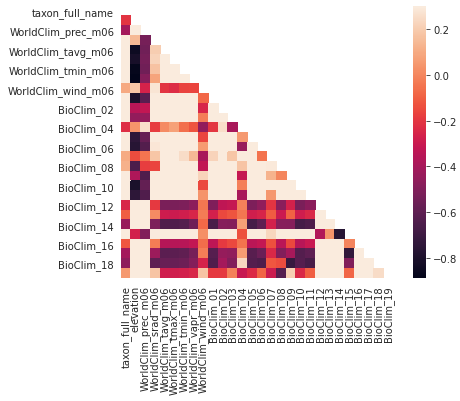

In [7]:
correlation = ['taxon_full_name','elevation', 'WorldClim_prec_m06', 'WorldClim_srad_m06',
       'WorldClim_tavg_m06', 'WorldClim_tmax_m06', 'WorldClim_tmin_m06',
       'WorldClim_vapr_m06', 'WorldClim_wind_m06', 'BioClim_01', 'BioClim_02',
       'BioClim_03', 'BioClim_04', 'BioClim_05', 'BioClim_06', 'BioClim_07',
       'BioClim_08', 'BioClim_09', 'BioClim_10', 'BioClim_11', 'BioClim_12',
       'BioClim_13', 'BioClim_14', 'BioClim_15', 'BioClim_16', 'BioClim_17',
       'BioClim_18', 'BioClim_19']
plot_correlation_matrix(df[correlation])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model 1 with SpargeTopKCategoricalAccuracy (k=1)

In [9]:
# With SparseTopKCategoricalAccuracy k=1
def train_model1(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    output_neurons = len(y_train.unique())

    model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(56, activation='relu'),
      tf.keras.layers.Dense(28, activation='relu'),
      tf.keras.layers.Dense(output_neurons, activation='sigmoid')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    acc = tf.keras.metrics.SparseTopKCategoricalAccuracy(
        k=1, name="sparse_top_k_categorical_accuracy", dtype=None
    )

    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=[acc])  
                  
    model_history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

    plot_sparse_accuracy('Model 1 (sparse_categorical_crossentropy 1)', model_history)
    plot_loss('Model 1 (sparse_categorical_crossentropy 1)', model_history)

    return model1

# model1 = train_model1(X, y)

## Model 2 with SpargeTopKCategoricalAccuracy (k=2)

In [10]:
def train_model2(X_train, X_test, y_train, y_test):

    output_neurons = len(y_train.unique())

    model = tf.keras.Sequential([

      tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'),

      tf.keras.layers.Dense(128, activation='relu'),

      tf.keras.layers.Dense(56, activation='relu'),

      tf.keras.layers.Dense(28, activation='relu'),

      tf.keras.layers.Dense(output_neurons, activation='sigmoid')

    ])



    opt = tf.keras.optimizers.Adam(learning_rate=0.001)

    acc = tf.keras.metrics.SparseTopKCategoricalAccuracy(

        k=2, name="sparse_top_k_categorical_accuracy", dtype=None

    )



    model.compile(optimizer=opt,

                  loss='sparse_categorical_crossentropy',

                  metrics=[acc])  



    model_history = model.fit(X_train, 

                              y_train, 

                              validation_data=(X_test, y_test), 

                              epochs=200)



    plot_sparse_accuracy('Model 2 (sparse_categorical_crossentropy 2)', model_history)

    plot_loss('Model 2 (sparse_categorical_crossentropy 2)', model_history)



    return model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model2 = train_model2(X_train, X_test, y_train, y_test)

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

118/118 [==============================] - 0s 3ms/step - loss: 1.2001 - sparse_top_k_categorical_accuracy: 0.7657 - val_loss: 1.1129 - val_sparse_top_k_categorical_accuracy: 0.8108
Epoch 2/200
118/118 [==============================] - 0s 2ms/step - loss: 0.9878 - sparse_top_k_categorical_accuracy: 0.8236 - val_loss: 0.9717 - val_sparse_top_k_categorical_accuracy: 0.8135
Epoch 3/200
118/118 [==============================] - 0s 2ms/step - loss: 0.8849 - sparse_top_k_categorical_accuracy: 0.8

118/118 [==============================] - 0s 2ms/step - loss: 0.5977 - sparse_top_k_categorical_accuracy: 0.9126 - val_loss: 0.6537 - val_sparse_top_k_categorical_accuracy: 0.8987
Epoch 40/200
118/118 [==============================] - 0s 2ms/step - loss: 0.6028 - sparse_top_k_categorical_accuracy: 0.9129 - val_loss: 0.6387 - val_sparse_top_k_categorical_accuracy: 0.9008
Epoch 41/200
118/118 [==============================] - 0s 2ms/step - loss: 0.5892 - sparse_top_k_categorical_accuracy: 0.9177 - val_loss: 0.6805 - val_sparse_top_k_categorical_accuracy: 0.9035
Epoch 42/200
118/118 [==============================] - 0s 2ms/step - loss: 0.5833 - sparse_top_k_categorical_accuracy: 0.9161 - val_loss: 0.6632 - val_sparse_top_k_categorical_accuracy: 0.9084
Epoch 43/200
118/118 [==============================] - 0s 2ms/step - loss: 0.5918 - sparse_top_k_categorical_accuracy: 0.9198 - val_loss: 0.6367 - val_sparse_top_k_categorical_accuracy: 0.9051
Epoch 44/200
118/118 [=====================

## Model 3 with binary crossentropy

In [ ]:
def train_model3(X_train, X_test, y_train, y_test, oversample=False, verbose=1):

    output_neurons = len(y_train.columns)

    if oversample:
        oversampler = RandomOverSampler()
        
        X_train, y_train = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())
        
        output_neurons = len(y_train[0])


    model = tf.keras.Sequential([

      tf.keras.layers.Dense(256, 

                        activation='relu',

                        kernel_initializer='he_uniform'),

      tf.keras.layers.Dense(128, activation='relu'),

      tf.keras.layers.Dense(56, activation='relu'),

      tf.keras.layers.Dense(28, activation='relu'),

      tf.keras.layers.Dense(output_neurons, activation='sigmoid')

    ])



    opt = tf.keras.optimizers.Adam(learning_rate=0.001)



    model.compile(optimizer=opt,

                    loss='binary_crossentropy',

                    metrics=['accuracy'])

    

    model_history = model.fit(X_train, 

                              y_train, 

                              validation_data=(X_test, y_test), 

                              epochs=200, 

                              batch_size=100,

                              verbose=verbose)



    if verbose == 1:
        
        plot_accuracy('Model 3 (binary_crossentropy)', model_history)
        
        plot_loss('Model 3 (binary_crossentropy)', model_history)
        
    return model

In [ ]:
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model3 = train_model3(X_train, X_test, y_train, y_test)

In [ ]:
analyse(X_train, X_test, y_train, y_test, model3, 0.5)

# Visualize the predictions
Import full environment dataset to make predictions on

In [ ]:
# Prepare full Europe environment dataset
df_env = pd.read_csv(repo_path / 'data/prepared/data_env_fixed_prepared.csv', index_col=0)

# Categorize Land Climate data
df_env['land_climate'], categories_land = create_cat_values(df_env['land_climate'], 'land_climate')

# Remove all water bodies from dataset
df_env_no_water = df_env[df_env['land_climate'] != 'Water Bodies']
df_env_no_water.dropna(inplace=True)

# Normalize the data
column_to_norm = ['elevation', 'WorldClim_prec_m06', 'WorldClim_srad_m06',
       'WorldClim_tavg_m06', 'WorldClim_tmax_m06', 'WorldClim_tmin_m06',
       'WorldClim_vapr_m06', 'WorldClim_wind_m06', 'BioClim_01', 'BioClim_02',
       'BioClim_03', 'BioClim_04', 'BioClim_05', 'BioClim_06', 'BioClim_07',
       'BioClim_08', 'BioClim_09', 'BioClim_10', 'BioClim_11', 'BioClim_12',
       'BioClim_13', 'BioClim_14', 'BioClim_15', 'BioClim_16', 'BioClim_17',
       'BioClim_18', 'BioClim_19']
df_env_no_water[column_to_norm] = df_env_no_water[column_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

df_env_no_water.head()

In [ ]:
def predict(model, df_env):
    # Predict likelyhood of butterfly being present on all locations in Europe
    prob = model.predict(df_env)

    judge_species0 = prob[:, 0]
    judge_species1 = prob[:, 1] 
    judge_species2 = prob[:, 2]
    judge_species3 = prob[:, 3]
    judge_species4 = prob[:, 4]

    return judge_species0, judge_species1, judge_species2, judge_species3, judge_species4

# Predict likelyhood with best model (model3)
judge_species0, judge_species1, judge_species2, judge_species3, judge_species4 = predict(model3, df_env_no_water)

In [ ]:
# Visualisations
def plot_positives(environment, judge, boundary):
    positives = environment[judge >= boundary]

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    ax = world.plot(color='white', edgecolor='black', figsize=(40, 40))

    gdf = gpd.GeoDataFrame(
        positives, 
        geometry=gpd.points_from_xy(positives['lon_latlon'], 
                                    positives['lat_latlon']))
    gdf.plot(ax=ax, markersize=15)

    #Define map boundaries
    plt.xlim(-25, 43)
    plt.ylim(33, 72)

    plt.show()

def plot_probability(environment, judge, boundary):
    positives = environment[judge >= boundary]
    judge_positives = judge[judge >= boundary]

    preds = positives[['lat_latlon', 'lon_latlon']]
    preds['judge'] = judge_positives

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    ax = world.plot(color='white', edgecolor='black', figsize=(40, 40))

    gdf = gpd.GeoDataFrame(
        positives, 
        geometry=gpd.points_from_xy(preds['lon_latlon'], 
                                    preds['lat_latlon']))
    gdf.plot(ax=ax, 
             column=preds['judge'], 
             legend=True, 
             markersize=15, 
             legend_kwds={'shrink': 0.5})

    #Define map boundaries
    plt.xlim(-25, 43)
    plt.ylim(33, 72)

    plt.show()

    # Returns DataFrame with locations and prediction certainty
    return preds

In [ ]:
judge_species0.max()

## Species 0 (Agriades optilete)

In [ ]:
# plot_positives(df_env_no_water, judge_species0, .5)
preds = plot_probability(df_env_no_water, judge_species0, .01)

## Species 1 (Boloria titania)

In [ ]:
# plot_positives(df_env_no_water, judge_species1, .5)
preds = plot_probability(df_env_no_water, judge_species1, .01)

## Species 2 (Melanargia galathea)

In [ ]:
# plot_positives(df_env_no_water, judge_species2, .5)
preds = plot_probability(df_env_no_water, judge_species2, .01)

## Species 3 (Parnassius apollo)

In [ ]:
# plot_positives(df_env_no_water, judge_species3, .5)
preds = plot_probability(df_env_no_water, judge_species3, .01)

## Species 4 (Zerynthia rumina)

In [ ]:
plot_positives(df_env_no_water, judge_species4, .5)
# preds = plot_probability(df_env_no_water, judge_species4, .01)

# Oversampling

In [ ]:
# Predict likelyhood with best model (model3) AND oversampling
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model3_oversample = train_model3(X_train, X_test, y_train, y_test, oversample=True, verbose=0)

judge_species0_oversample, judge_species1_oversample, judge_species2_oversample, judge_species3_oversample, judge_species4_oversample = predict(model3_oversample, df_env_no_water)

analyse(X_train, X_test, y_train, y_test, model3_oversample, 0.5)

## Normal visualisation

In [ ]:
preds = plot_probability(df_env_no_water, judge_species0, .5)

## Visualisation with oversampling

In [ ]:
preds = plot_probability(df_env_no_water, judge_species0_oversample, .5)

# Feature dropping (coordinates)

In [ ]:
# Drop coordinates
X_without_coordinates = X.drop(['obs_latitude', 'obs_longitude'], axis=1)
df_env_no_water_coordinates = df_env_no_water.drop(['lat_latlon', 'lon_latlon'], axis=1)

X_without_coordinates.head()

In [ ]:
# Predict likelyhood with best model (model3) AND oversampling
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X_without_coordinates, y, test_size=0.33, random_state=42)

# Predict likelyhood with best model (model3) WITHOUT coordinates
model3_without_coordinates = train_model3(X_train, X_test, y_train, y_test,oversample=False, verbose=0)

judge_species0_without_coordinates, judge_species1_without_coordinates, judge_species2_without_coordinates, judge_species3_without_coordinates, judge_species4_without_coordinates = predict(model3_without_coordinates, df_env_no_water_coordinates)

analyse(X_train, X_test, y_train, y_test, model3_without_coordinates, 0.5)

## Normal visualisation

In [ ]:
preds = plot_probability(df_env_no_water, judge_species4, .01)

## Visualisation with feature dropping (coordinates)

In [ ]:
preds = plot_probability(df_env_no_water, judge_species4_without_coordinates, .01)

## Visualisation with SpargeKCategorigical (k=2)

In [ ]:
judge_species0_k2, judge_species1_k2, judge_species2_k2, judge_species3_k2, judge_species4_k2 = predict(model2, df_env_no_water)

preds = plot_probability(df_env_no_water, judge_species4_k2, .01)

In [ ]:
judge_species4_k2

## Visualisation with oversampling

In [ ]:
preds = plot_probability(df_env_no_water, judge_species4_oversample, .5)